In [183]:
import numpy as np
from PIL import Image
from matplotlib import pylab as pylab
from matplotlib import pyplot as plt

from mdctn import mdct, imdct

%matplotlib inline
pylab.rcParams['figure.figsize'] = (8, 8)

In [184]:
y, cb, cr = Image.open('images/earth-1024.png').convert('YCbCr').split()

In [185]:
im = np.array(y, dtype=np.int64)
im = im[:im.shape[0] - im.shape[0]%8, :im.shape[1] - im.shape[1]%8]

Text(0.5, 1.0, 'Original image in graymap')

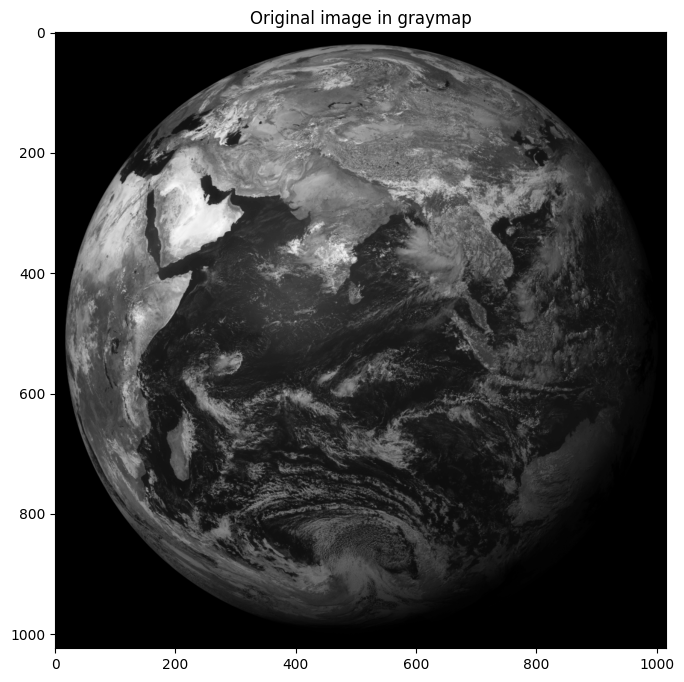

In [186]:
plt.figure()
plt.imshow(im, cmap='gray')
plt.title("Original image in graymap")

In [187]:
dct = np.zeros(im.shape)

for i in range(im.shape[0]):
    dct[i] = mdct(im[i], N=16, type=2)

for i in range(dct.shape[1]):
    dct[:, i] = mdct(dct[:, i], N=16, type=2)

Text(0.5, 1.0, 'Image mDCT in graymap')

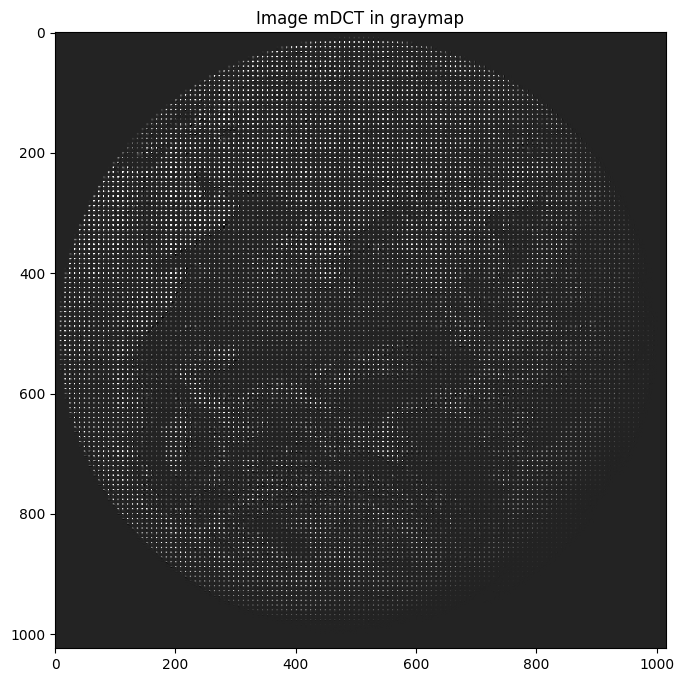

In [188]:
plt.figure()
plt.imshow(dct, cmap='gray', vmax=np.max(dct)*0.1, vmin=np.min(dct)*0.1)
plt.title("Image mDCT in graymap")

In [189]:
dct_mask = np.zeros((8, 8))

dct_mask = np.array([
    [1, 1, 1, 1, 0, 0, 0, 0],
    [1, 1, 1, 0, 0, 0, 0, 0],
    [1, 1, 0, 0, 0, 0, 0, 0],
    [1, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 0],
])


# dct_mask = np.array([
#     [1, 1, 1, 1, 1, 1, 1, 1],
#     [1, 1, 1, 1, 1, 1, 1, 1],
#     [1, 1, 1, 1, 1, 1, 1, 1],
#     [1, 1, 1, 1, 1, 1, 1, 1],
#     [1, 1, 1, 1, 1, 1, 1, 0],
#     [1, 1, 1, 1, 1, 1, 0, 0],
#     [1, 1, 1, 1, 1, 0, 0, 0],
#     [1, 1, 1, 1, 0, 0, 0, 0],
# ])

# dct_mask = np.ones((8, 8))

for i in np.r_[:dct.shape[0]:8]:
    for j in np.r_[:dct.shape[1]:8]:
        dct[i:(i+8),j:(j+8)] = dct[i:(i+8), j:(j+8)] * dct_mask

Text(0.5, 1.0, 'Modified imageDCTs in graymap')

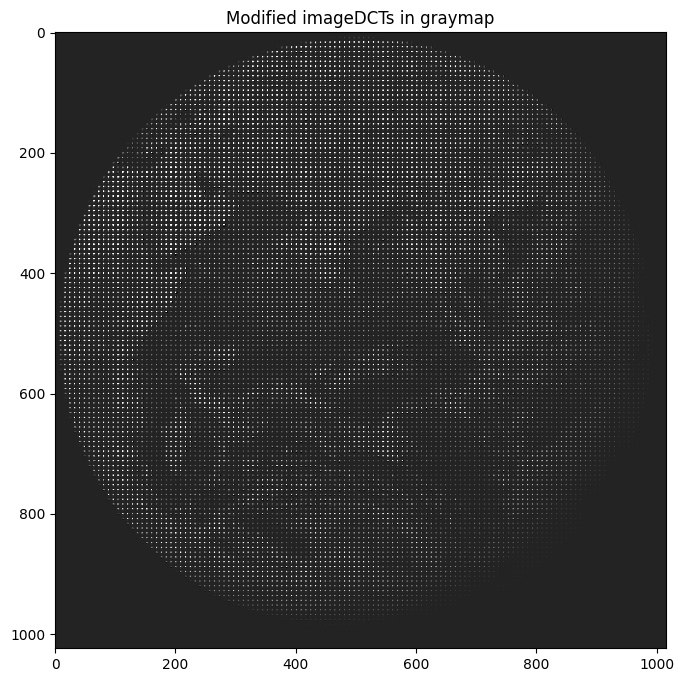

In [190]:
plt.figure()
plt.imshow(dct, cmap='gray', vmax=np.max(dct)*0.1, vmin=np.min(dct)*0.1)
plt.title("Modified imageDCTs in graymap")

In [191]:
rec = np.zeros(im.shape)

for i in range(dct.shape[1]):
    rec[:, i] = imdct(dct[:, i], N=16, type=2)

for i in range(im.shape[0]):
    rec[i] = imdct(rec[i], N=16, type=2)

Text(0.5, 1.0, 'Reconstructed image in graymap')

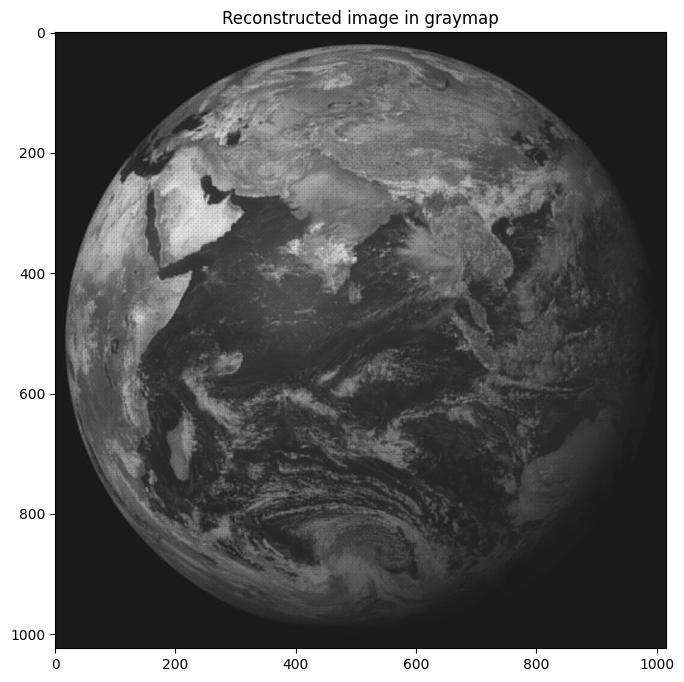

In [192]:
plt.figure()
plt.imshow(rec, cmap='gray')
plt.title("Reconstructed image in graymap")

In [193]:
np.allclose(im, rec)

False

Text(0.5, 1.0, 'Original image vs reconstructed. No windowing.')

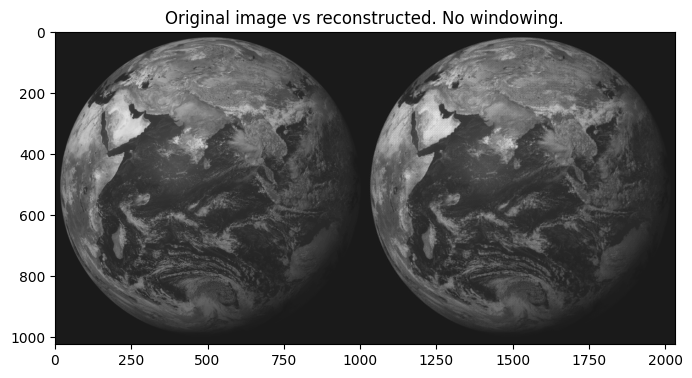

In [194]:
plt.figure()
plt.imshow(np.hstack([im, rec]), cmap='gray')
plt.imsave(f'window.png', np.hstack([im, rec]), cmap='gray')
plt.title("Original image vs reconstructed. No windowing.")

In [195]:
np.abs(im - rec).max()

69.03041742803455

Text(0.5, 1.0, 'Image difference in graymap')

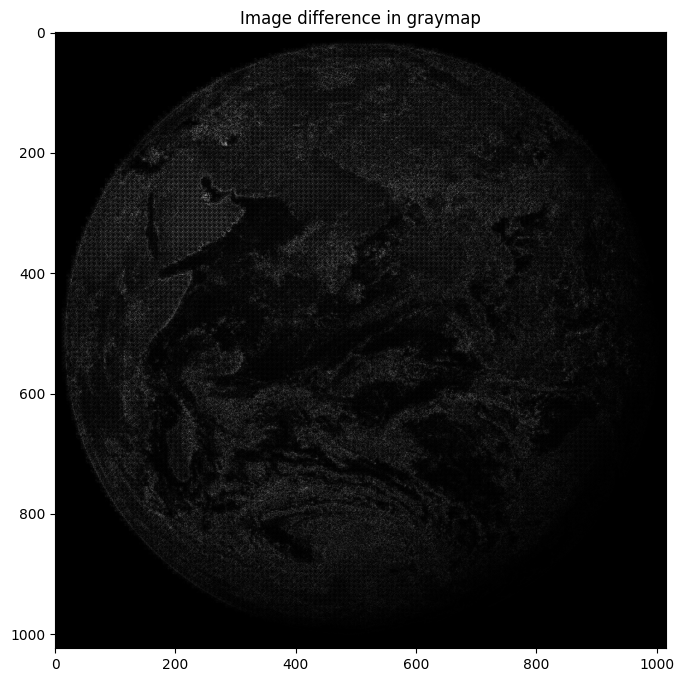

In [196]:
diff=np.abs(im - rec)

# diff[diff < diff.mean() * 100] = 0

plt.figure()
plt.imshow(diff, cmap='gray')
plt.title("Image difference in graymap")

In [197]:
s = diff.sum(axis=0)

In [198]:
s

array([0.        , 0.        , 0.        , ..., 0.13000385, 0.07862889,
       0.00257392])